In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
plt.style.use('default')
melb_data = pd.read_csv('data/melb_data_fe.csv', sep=',')
datas = pd.read_csv('data/students_performance.csv', sep = ',' )
bike= pd.read_csv('data/citibike-tripdata.csv')
nlo = pd.read_csv('data/ufo.csv',sep = ',')
dates = pd.read_csv('data/dates.csv', sep=',')
churn = pd.read_csv('/Users/dmitr/project_vs/data/data/churn.csv')
ratings2 = pd.read_csv('data/ratings2.csv')
movies = pd.read_csv('data/movies.csv')
ratings_movies = pd.read_csv('data/ratings_movies.csv')
orders = pd.read_csv('data/orders.csv',sep=';')

product = pd.read_csv('/Users/dmitr/project_vs/data/data/prdct.csv',sep = ';')

covid_data = pd.read_csv('data/covid_data.csv')
vaccinations = pd.read_csv('data/country_vaccinations.csv')

In [3]:
covid_data = covid_data.groupby(['date','country'] , as_index=False)[['confirmed','deaths','recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country' , 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

vaccinations['date'] = pd.to_datetime(vaccinations['date'])
start_date ='2020-12-02'
end_date = '2021-09-06'
covid_datas = covid_data[(covid_data['date']>=start_date) & (covid_data['date']<=end_date)]
vaccinationss = vaccinations[(vaccinations['date']>=start_date)&(vaccinations['date'] <=end_date)]
covid_vac = pd.merge(covid_data,vaccinations , how='left',on=['date' , 'country'])


covid_vac['death_rate'] = (covid_vac['deaths'] / covid_vac['confirmed']) *100
covid_vac['recovery_rate'] = (covid_vac['recovered'] / covid_vac['confirmed']) *100
mask1 = covid_vac[covid_vac['country'] == 'Russia']
mask1['recovery_rate'].describe()

count    485.000000
mean      67.062735
std       29.904159
min        0.000000
25%       58.134801
50%       79.358398
75%       88.428421
max      100.000000
Name: recovery_rate, dtype: float64

<Axes: xlabel='country'>

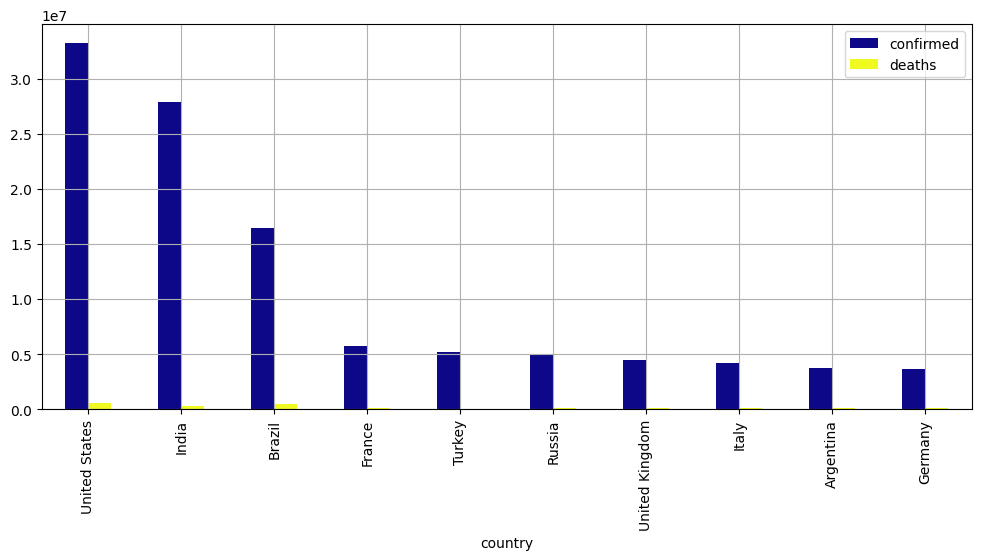

In [141]:
covid_case1 = covid_vac.groupby(['country'])[['confirmed','deaths']].last()

covid_case1 = covid_case1.nlargest(10,columns=['confirmed'])
covid_case1.plot(kind='bar',figsize=(12,5),colormap='plasma', grid=True)

([<matplotlib.patches.Wedge at 0x2242e20b760>,
 [Text(0.7665420934957, 0.9232622698341083, 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.5931469540063179, 0.9263782655875661, 'Oxford/AstraZeneca'),
  Text(-1.0669756518152362, 0.26751253883407417, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.9691397141646498, -0.5203539318856552, 'Oxford/AstraZeneca, Sinopharm/Beijing'),
  Text(-0.42855913880528995, -1.013082950476647, 'Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(0.162764772670222, -1.0878913680959192, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'),
  Text(0.6404448584916131, -0.894332367317463, 'Moderna, Pfizer/BioNTech'),
  Text(0.9150658010408986, -0.610454404329577, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'),
  Text(1.03477305208093, -0.3731551027215323, 'Pfizer/BioNTech'),
  Text(1.092724197741022, -0.126308462389659, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V')],
 [Text(0.4471495545391

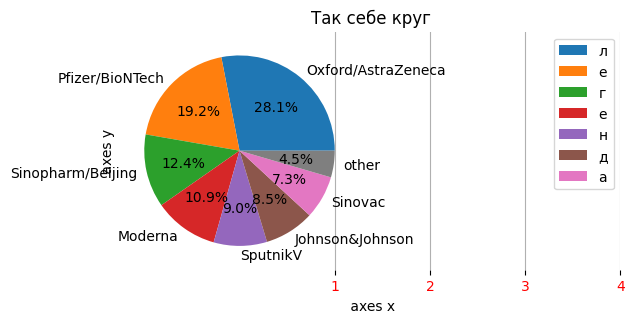

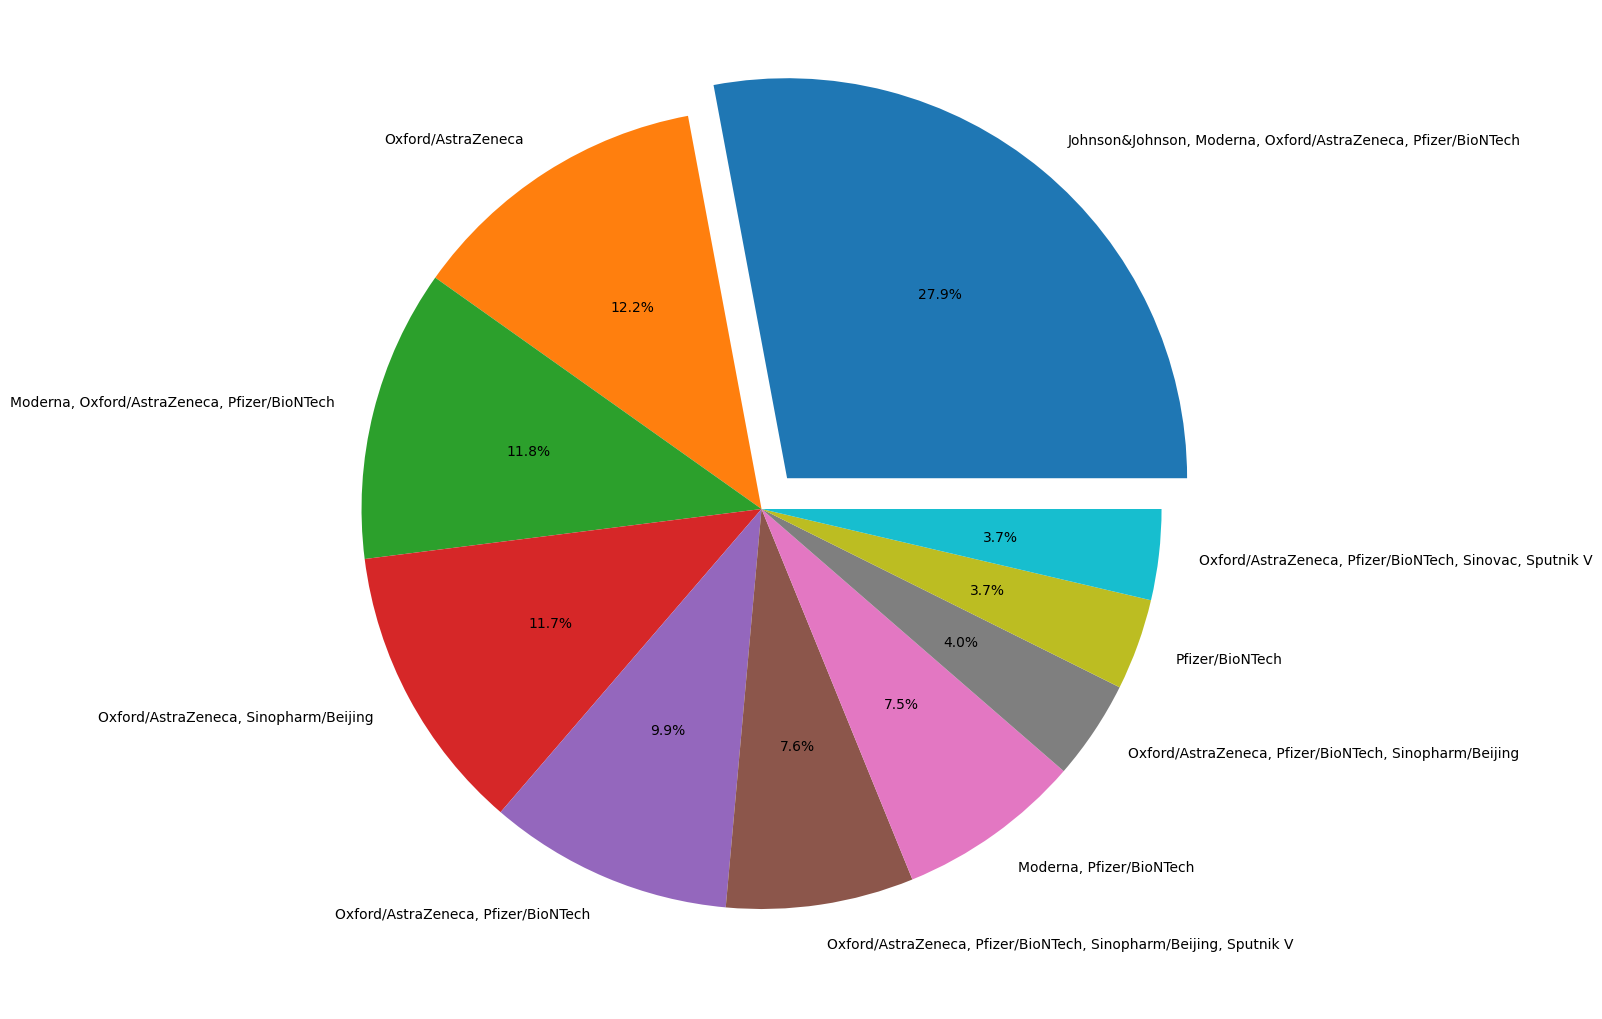

In [168]:
vaccines_nonan = covid_vac.dropna(subset = ['vaccines'])

comb = vaccines_nonan.groupby(['country'])['vaccines'].last()
comb = comb.apply(lambda x : x.replace(' ', '').split(','))

vaccines_dict = {}

for vaccines_list in comb:
    for vaccine in vaccines_list:
        if vaccine not in vaccines_dict:
            vaccines_dict[vaccine] = 1
        else : 
            vaccines_dict[vaccine] +=1
            
vaccines = pd.Series(vaccines_dict).sort_values(ascending= False )
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]


fig = plt.figure(figsize = (5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(vaccines, labels= vaccines.index, autopct='%.1f%%')

axes.set_title('Так себе круг')
axes.set_xlabel(' axes x')
axes.set_ylabel(' axes y ')
axes.set_xticks(ticks= [1,2,3,4]) # тоже самое и для игрика можно делать

axes.xaxis.set_tick_params(labelcolor = 'r')
axes.grid(axis='both' )
axes.legend('легенда')#здесь нужно было 8 штук указать




vaccines_comb = covid_vac['vaccines'].value_counts()[:10]
fig = plt.figure(figsize = (10,10))
axes = fig.add_axes([0,0,1,1])
axes.pie(vaccines_comb, labels= vaccines_comb.index , autopct = '%.1f%%' , explode = [0.1,0,0,0,0,0,0,0,0,0])

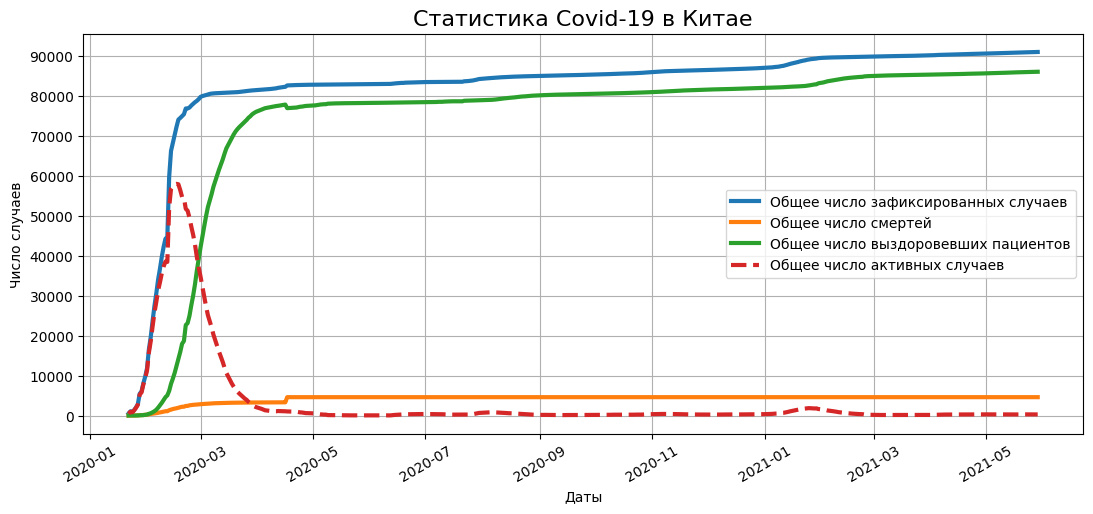

In [169]:
china_data = covid_vac[covid_vac['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

fig = plt.figure(figsize = (10,4))


axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend()




In [170]:
filter_df = melb_data[melb_data['Price']<3000000]
filter_df = filter_df[filter_df['Type'] == 'h']
filter_df = filter_df['Regionname'].mode()
display(filter_df)

filtered_df = datas[datas['test preparation course'] == 'completed']

# Then, use the 'mean()' function to calculate the mean of the 'reading score' column in the filtered DataFrame
mean_score = filtered_df['reading score'].mean()

print(mean_score)
datas[datas['math score'] == 0]

Series([], Name: Regionname, dtype: object)

In [172]:
group_a = datas[datas['race/ethnicity'] == 'group A']
group_b = datas[datas['race/ethnicity'] == 'group C']
group_a['writing score'].median()
group_b['writing score'].median()
round(datas[datas['test preparation course'] == 'completed']['reading score'].mean())

datas["parental level of education"].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [173]:
dts= melb_data.copy()

In [174]:
def get_experience(arg):
    year = 0
    mounts = 0
    years =['лет', "год","года"]
    moun = ['месяцев', 'месяца','месяц']
    args = arg.split()
    for i in range(len(args)):
        if args[i] in years:
            year = int(args[i-1]) *12
        if args[i] in moun:
            mounts = int(args[i-1])
    exp = year + mounts
    return exp

In [178]:
bike['starttime']= pd.to_datetime(bike['starttime'],dayfirst=True)
bike['stoptime'] = pd.to_datetime(bike['stoptime'],dayfirst=False)
#display(bike['starttime'])

In [179]:
bike['trip duration'] = bike['stoptime'] - bike['starttime']
bike['trip duration'][3]

Timedelta('235 days 00:07:16.837000')

In [180]:

def get_weekend(weekday):
    if weekday == 5 or weekday == 6:
        return 1
    else: return 0
    
    
dts['Weekday'] = dts['WeekdaySale'].apply(get_weekend)
#display(dts['Weekday'])
mts = dts[dts['Weekday'] == 1]
#display(mts['Price'].mean())

In [181]:
bike['weekends'] = bike['starttime'].dt.dayofweek
display(bike['weekends'].value_counts())

weekends
4    115864
0     68628
2     61185
1     54323
Name: count, dtype: int64

In [182]:
#bike['weekends'].apply(get_weekend)



In [183]:
def time_of_day(time):
    if 0 <= time.hour <= 6:
        return "night"
    elif 6 < time.hour <= 12:
        return "morning"
    elif 12 < time.hour <= 18:
        return "day"
    else:
        return "evening"


bike['timeofday'] = bike['starttime'].apply(time_of_day)
#display(bike['timeofday'])
bikesd = bike[bike['timeofday']== 'day']
bikesn = bike[bike['timeofday']=='night']
ratio = bikesd.shape[0]/bikesn.shape[0]
#display(ratio)

In [185]:
dts['Date'] = pd.to_datetime(dts['Date'],dayfirst=False)

In [186]:
lst = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car']
count_col = 150
for i in dts.columns:
    if dts[i].nunique() < count_col and i not in lst:
        dts[i] = dts[i].astype('category')
        

dts['Date'].dt.quarter.value_counts()
dts.sort_values(by=['Price', 'Distance'], ascending=False).loc[::10,['Price','Distance']]
mask1 = dts['AreaRatio'] < - 0.8
mask2 = dts['Type'] == 'townhouse'
mask3 = dts['SellerG'] == 'McGrath'
dts[mask1 & mask2 & mask3].sort_values(by= ['Date','AreaRatio'],ascending=[True,False],ignore_index=True).loc[:,['Date' , 'AreaRatio']]

,Date,AreaRatio
0,2016-07-26,-0.974922
1,2016-09-24,-0.971831
2,2016-11-27,-0.953608
3,2016-12-11,-0.945946
4,2017-08-04,-0.947368
5,2017-08-04,-0.970874


In [196]:
#dts.sort_values(by = 'AreaRatio', ascending= False,ignore_index= True).loc[1558,['BuildingArea']]
mask2 = dts['Type'] == 'townhouse'
mask_1 = dts['Rooms'] > 2 

dts[mask2 & mask_1].sort_values(by = ['Rooms', 'MeanRoomsSquare'], ascending=[True,False],ignore_index= True).loc[18,['Price']]
dts.groupby(by = 'Type')['Price'].mean()dts.groupby('Regionname')['Distance'].min().sort_values(ascending=False)

dts.groupby('MonthSale')['Price'].agg(['count','mean','max']).sort_values(by = 'count',ascending=False)

dts.groupby('MonthSale')['Price'].agg('nunique')
#dts.groupby('Regionname')['SellerG'].agg('nunique',set)
dts.groupby('Regionname')['Lattitude'].agg('std').sort_values(ascending=False)

Type
house        1.242665e+06
townhouse    9.337351e+05
unit         6.051275e+05
Name: Price, dtype: float64

In [197]:
dts['Date'] = pd.to_datetime(dts['Date'],dayfirst=False)
mask = (dts['Date'] >= '2017-05-01') & (dts['Date'] <= '2017-09-01')

price = dts[mask]
#price.groupby('SellerG')['Price'].agg('sum').sort_values(ascending=True)



In [198]:
#dts.pivot_table(values='Price' , index ='Regionname',columns='Weekend',fill_value=0,aggfunc='count').round()
#dts.pivot_table(values=['Price'], columns='Regionname',index=['Method','Type'],aggfunc=['median','mean'],fill_value=0)

In [199]:
#dts.pivot_table(values='BuildingArea',index='Type',columns='Rooms',aggfunc='median')

#dts.pivot_table(values='Price',index='SellerG',columns='Type',aggfunc='median')

In [200]:
ratings = pd.concat([ratings1,ratings2],ignore_index=True)
ratings = ratings.drop_duplicates(ignore_index=True)
rating_dates = pd.concat([ratings,dates],axis=1)
rating_dates.head()

NameError: name 'ratings1' is not defined

In [ ]:


def concat_user_files(path):
    name_files = os.listdir(path)
    name_files.sort()
    names=[]
    for name in name_files:
        file = (path + '/' + name)
        df = pd.read_csv(file)
        
        names.append(df)       
        files = pd.concat(names,axis = 0,ignore_index=True)
        files = files.drop_duplicates()
    return files

In [ ]:
import pandas as pd

items_df = pd.DataFrame({
            'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394],
            'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
            'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
        })

purchase_df = pd.DataFrame({
            'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
            'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132],
            'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
        })

# Введите свое решение ниже
merged = items_df.merge(how = 'inner',right=purchase_df)
merged['costs'] = merged['stock_count'] * merged['price']
income = round(merged['costs'].sum())


In [202]:
import re 
def get_year_release(arg):
    #находим все слова по шаблону "(DDDD)"
    candidates = re.findall(r'\(\d{4}\)', arg) 
    # проверяем число вхождений
    if len(candidates) > 0:
        #если число вхождений больше 0,
	#очищаем строку от знаков "(" и ")"
        year = candidates[0].replace('(', '')
        year = year.replace(')', '')
        return int(year)
    else:
        #если год не указан, возвращаем None
        return None




ratings_movies['year_release'] = ratings_movies['title'].apply(get_year_release)
ratings_movies['year_release'].info()
mask1 = ratings_movies[ratings_movies['year_release']==1999]
mask1.groupby('title')['rating'].agg('mean').sort_values(ascending=True)

mask2 = ratings_movies[ratings_movies['year_release']==2010]
mask2.groupby('genres')['rating'].agg('mean').sort_values(ascending=True)
ratings_movies.groupby('userId')['genres'].agg('nunique').sort_values(ascending=False)


ratings_movies.groupby('userId')['rating'].agg('mean','count').sort_values(ascending=True)

mask3 = ratings_movies[ratings_movies['year_release']==2018]
tbl = mask3.groupby('genres')['rating'].agg(['sum','mean']).sort_values(by='sum',ascending=False)

ratings_movies['date']=pd.to_datetime(ratings_movies['date'])
ratings_movies['year_rating'] = ratings_movies['date'].dt.year
tlb = ratings_movies.pivot_table(values=['rating'],columns=['genres'],index=['year_release'])
display(tlb)

<class 'pandas.core.series.Series'>
RangeIndex: 100836 entries, 0 to 100835
Series name: year_release
Non-Null Count   Dtype  
--------------   -----  
100818 non-null  float64
dtypes: float64(1)
memory usage: 787.9 KB


rating                             \
genres       (no genres listed)    Action Action|Adventure   
year_release                                                 
1902.0                      NaN       NaN              NaN   
1903.0                      NaN       NaN              NaN   
1908.0                      NaN       NaN              NaN   
1915.0                      NaN       NaN              NaN   
1916.0                      NaN       NaN              NaN   
...                         ...       ...              ...   
2014.0                      NaN       NaN         2.562500   
2015.0                 3.083333  2.166667         3.000000   
2016.0                 2.812500  2.625000         3.083333   
2017.0                 3.550000  2.000000              NaN   
2018.0                      NaN       NaN              NaN   

                                                                             \
genres       Action|Adventure|Animation Action|Adventure|Animation|Children   
year_release                                                                  
1902.0                              NaN                                 NaN   
1903.0                              NaN                                 NaN   
1908.0                              NaN                                 NaN   
1915.0                              NaN                                 NaN   
1916.0                              NaN                                 NaN   
...                                 ...                                 ...   
2014.0                         3.766667                                 NaN   
2015.0                         3.500000                                 NaN   
2016.0                         3.375000                                 NaN   
2017.0                              NaN                                 NaN   
2018.0                              NaN                                 3.0   

                                                         \
genres       Action|Adventure|Animation|Children|Comedy   
year_release                                              
1902.0                                              NaN   
1903.0                                              NaN   
1908.0                                              NaN   
1915.0                                              NaN   
1916.0                                              NaN   
...                                                 ...   
2014.0                                         4.500000   
2015.0                                              NaN   
2016.0                                         3.890625   
2017.0                                              NaN   
2018.0                                              NaN   

                                                                 \
genres       Action|Adventure|Animation|Children|Comedy|Fantasy   
year_release                                                      
1902.0                                                      NaN   
1903.0                                                      NaN   
1908.0                                                      NaN   
1915.0                                                      NaN   
1916.0                                                      NaN   
...                                                         ...   
2014.0                                                 3.870968   
2015.0                                                      NaN   
2016.0                                                      NaN   
2017.0                                                      NaN   
2018.0                                                      NaN   

                                                              \
genres       Action|Adventure|Animation|Children|Comedy|IMAX   
year_release                                                   
1902.0                                                   NaN   
1903.0                     

In [203]:
orders_products = orders.merge(
    product, 
    left_on='ID товара',
    right_on='Product_ID',
    how='left')
orders_products[orders_products['Name'].isna()]

,Дата создания,Order ID,ID Покупателя,Статус,Оплачен,Отменен,Отгружен,ID товара,Количество,Product_ID,Name,Price,CURRENCY
17,01.01.2001 00:00:00,0,1,"Оплачен, формируется к отправке",Да,Нет,Нет,666,1,NaN,NaN,NaN,NaN


In [204]:
orders_products[orders_products['Отменен'] == 'Да']['Name']

6    Носки беговые Camino
Name: Name, dtype: object

In [205]:
orders_products['Profit'] = orders_products['Price'] * orders_products['Количество'] 
orders_products[orders_products['Оплачен'] == 'Да'].groupby('ID Покупателя')['Profit'].sum().sort_values(ascending=False)



ID Покупателя
7    17096.0
5    13043.0
8     1344.0
1        0.0
Name: Profit, dtype: float64

Text(0, 0.5, 'Суммарный объём продаж')

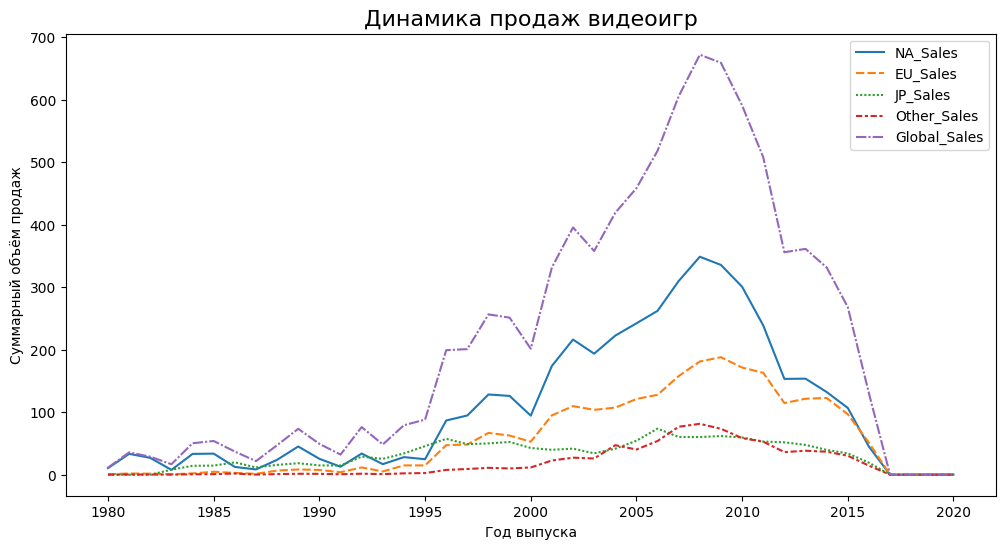

In [206]:
vg_data = pd.read_csv('data/Vg.csv')

dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж')

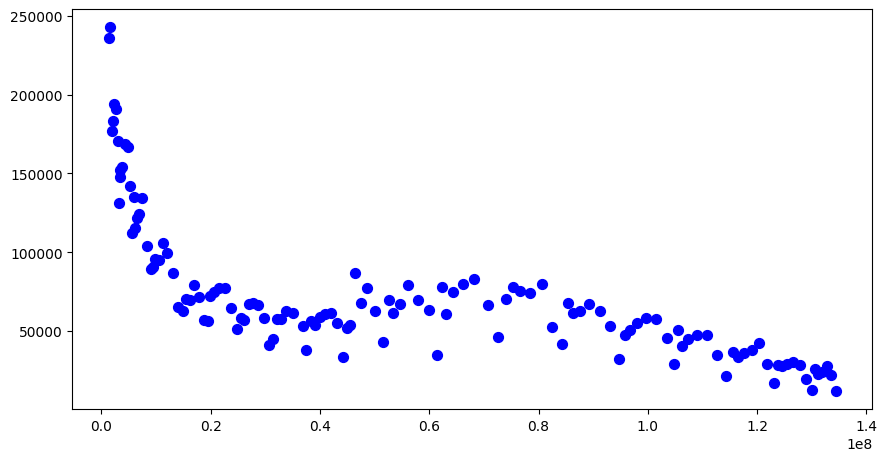

In [207]:
covid_case2 = covid_vac[covid_vac['country']=='United States']
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])
axes.scatter(x = covid_case2['people_fully_vaccinated'] ,y = covid_case2['daily_confirmed'] ,s = 50 ,marker = 'o' ,c = 'blue')

([<matplotlib.patches.Wedge at 0x223e080edf0>,
 [Text(0.7665420934957, 0.9232622698341083, 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.5931469540063179, 0.9263782655875661, 'Oxford/AstraZeneca'),
  Text(-1.0669756518152362, 0.26751253883407417, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.9691397141646498, -0.5203539318856552, 'Oxford/AstraZeneca, Sinopharm/Beijing'),
  Text(-0.42855913880528995, -1.013082950476647, 'Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(0.162764772670222, -1.0878913680959192, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'),
  Text(0.6404448584916131, -0.894332367317463, 'Moderna, Pfizer/BioNTech'),
  Text(0.9150658010408986, -0.610454404329577, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'),
  Text(1.03477305208093, -0.3731551027215323, 'Pfizer/BioNTech'),
  Text(1.092724197741022, -0.126308462389659, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V')],
 [Text(0.4471495545391

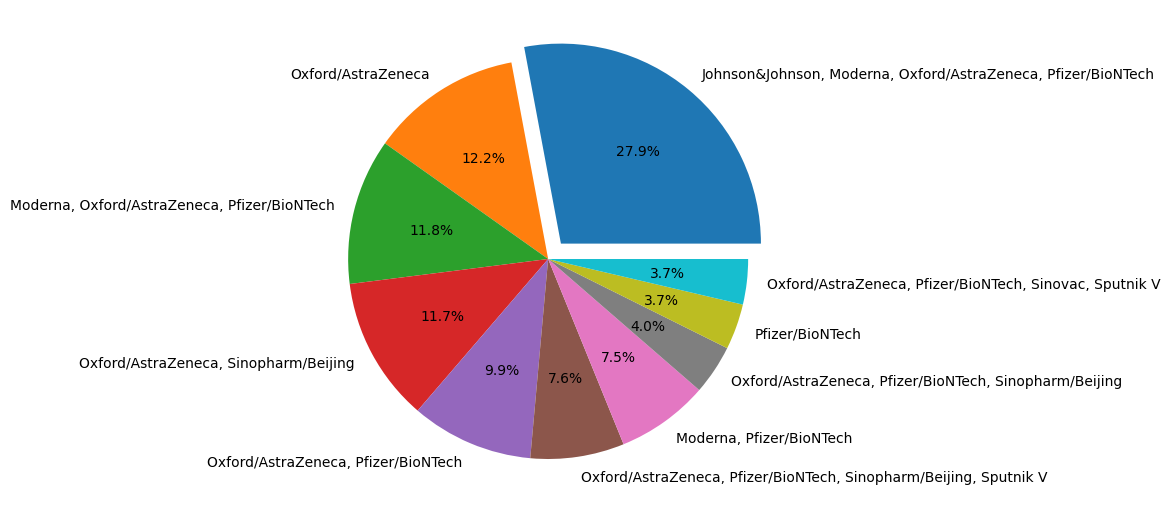

In [208]:
vaccine_combinations = covid_vac['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
)

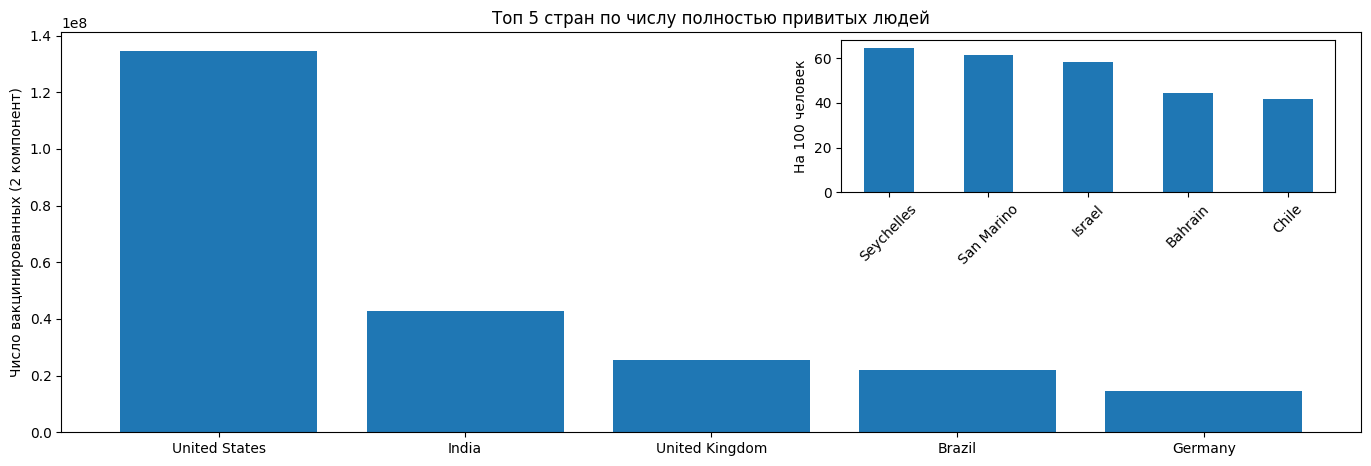

In [209]:

vacc_country = covid_vac.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_vac.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38]) #Примечание. Первые два числовых параметра, указанные при создании систем координат, — это отступ снизу и слева, следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

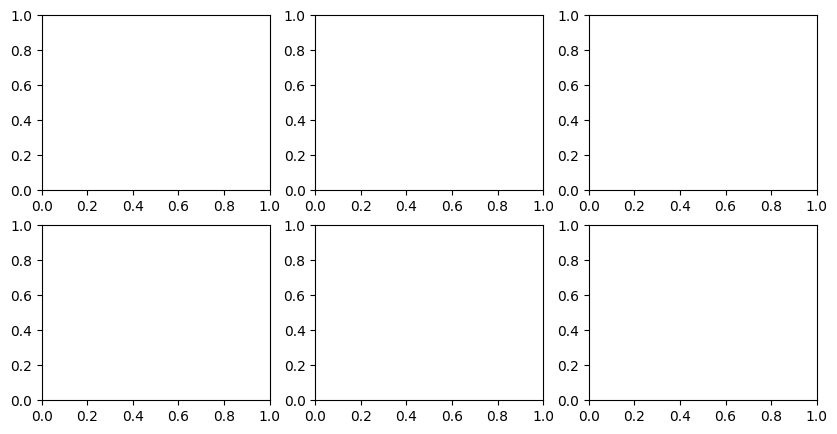

In [210]:
fig, axes = plt.subplots(nrows = 2, ncols =3 , figsize = (10,5))

Text(0.5, 1.0, 'Гистограмма заболеваемости в России')

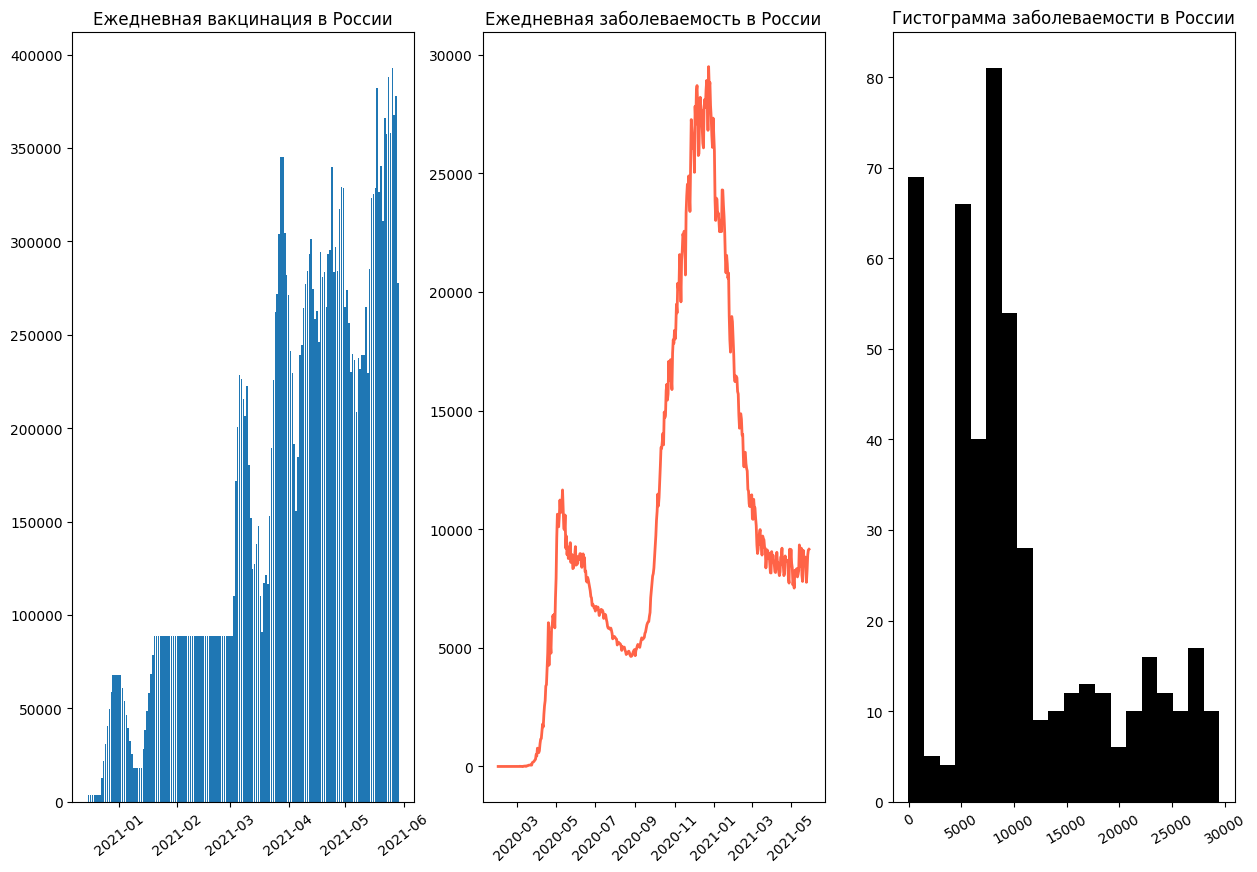

In [211]:
russia_data = covid_vac[covid_vac['country'] == 'Russia']
fig, axes = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,10))
axes[0].bar(x = russia_data['date'] , height = russia_data['daily_vaccinations'] , label = 'Число вакцинированных' )

axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation = 38)

axes[1].plot(russia_data['date'], russia_data['daily_confirmed'] , label = 'Число заболевших' , color = 'tomato' , lw = 2)
axes[1].xaxis.set_tick_params(rotation = 45)
axes[1].set_title('Ежедневная заболеваемость в России')



axes[2].hist(x = russia_data['daily_confirmed'], label = 'Число заболевших ' , color = 'black', bins = 20)

axes[2].xaxis.set_tick_params(rotation = 30)
axes[2].set_title('Гистограмма заболеваемости в России')


<Axes: xlabel='daily_confirmed_per_hundred', ylabel='country'>

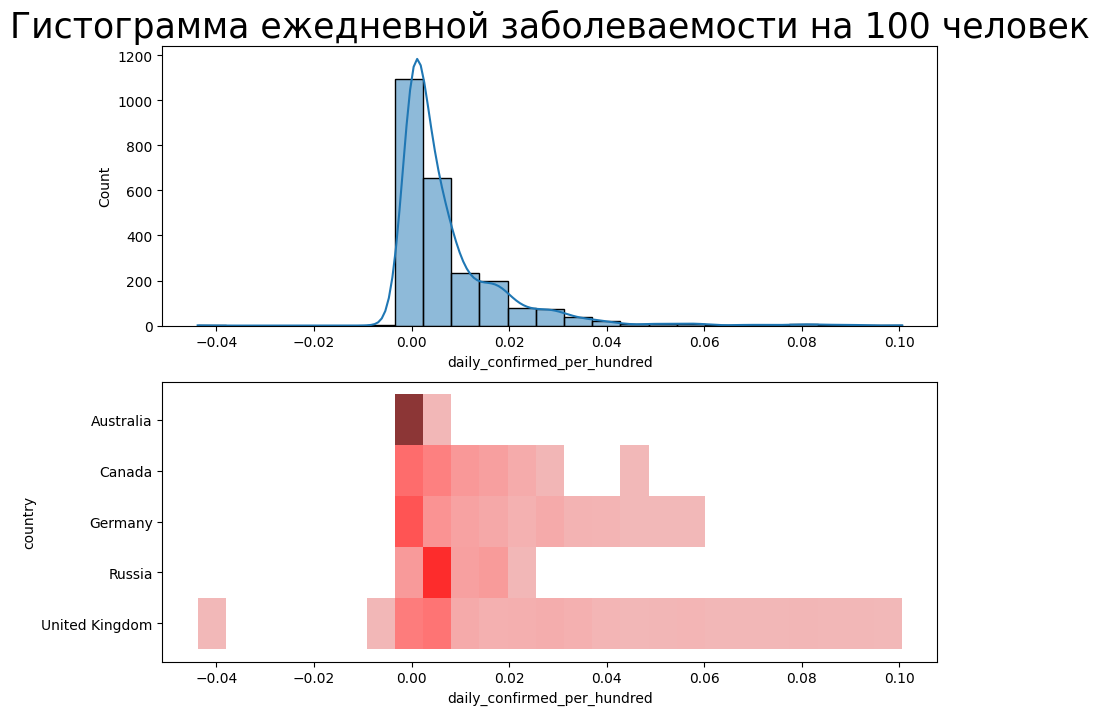

In [212]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_vac[covid_vac['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()
fig , axes = plt.subplots(nrows = 2 , ncols = 1, figsize = (10,8))

sns.histplot(data = croped_covid_df , x= 'daily_confirmed_per_hundred' , bins=25 , kde = True , ax= axes[0] )
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=25)


sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
)


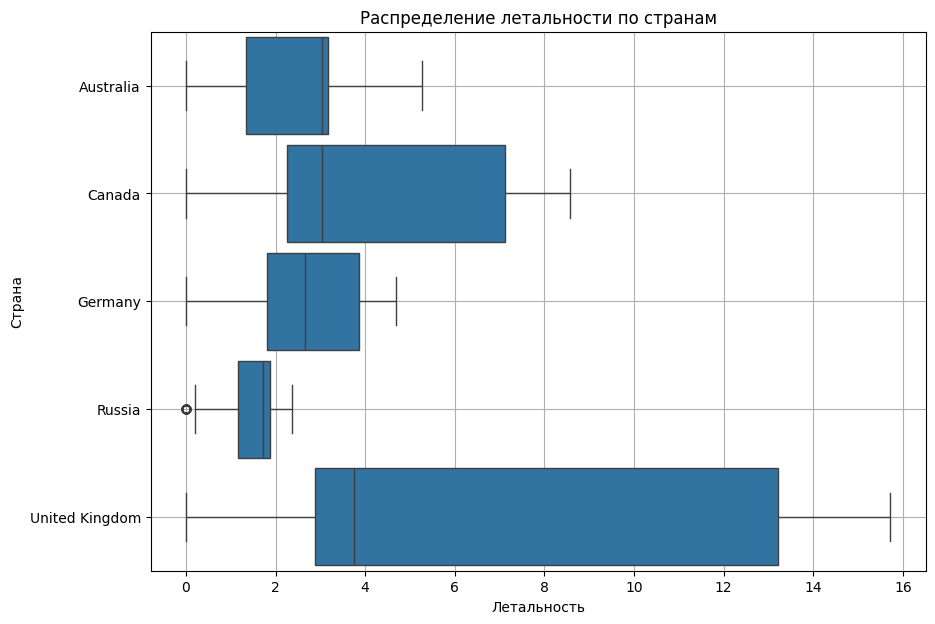

In [213]:
fig = plt.figure(figsize = (10,7))
boxplot = sns.boxplot(data = croped_covid_df , x = 'death_rate' , y = 'country' , orient = 'h' , width= 0.9)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()


Text(0.5, 1.0, 'Средний процент болеющего населения по кварталам')

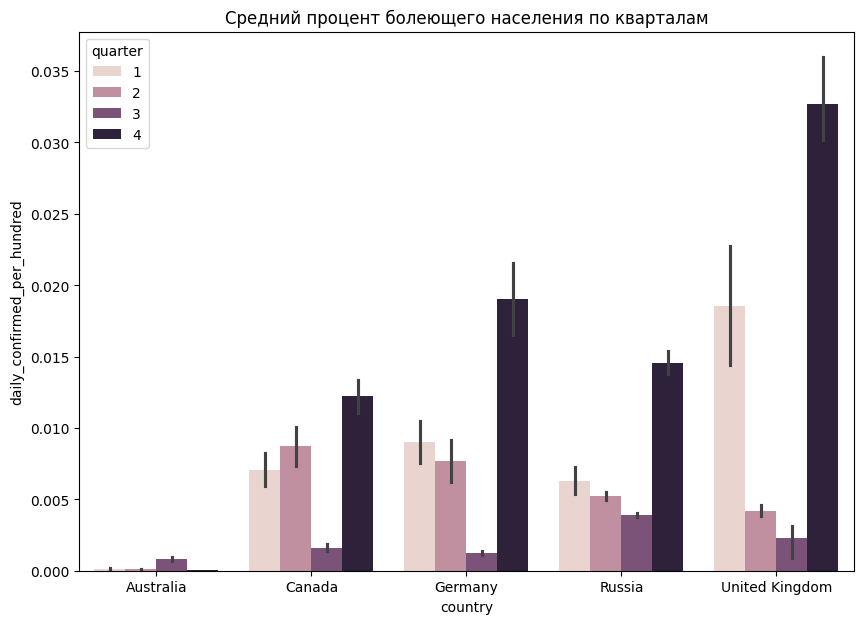

In [214]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам')




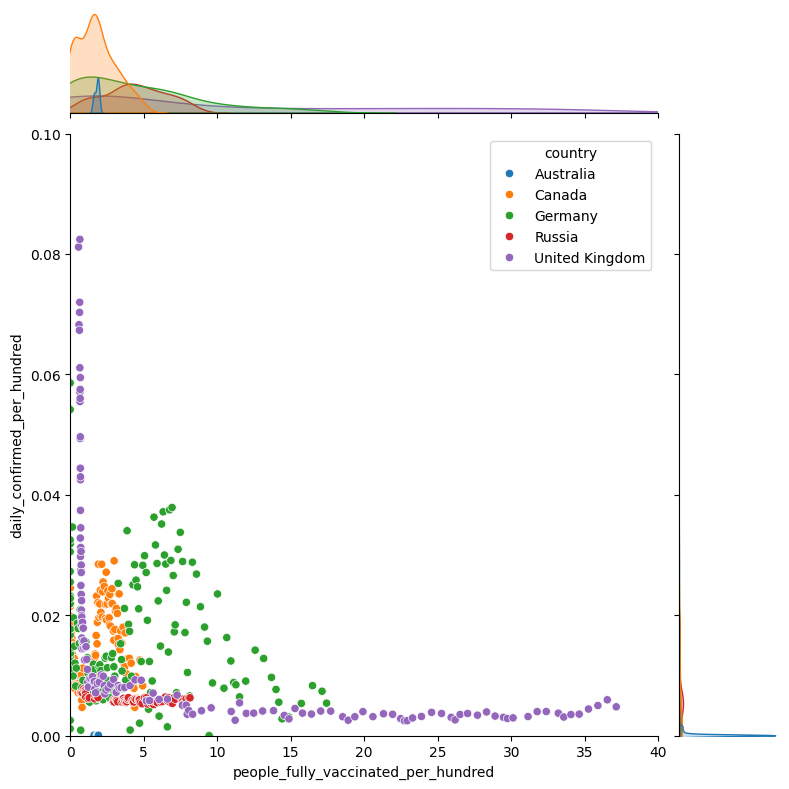

In [215]:
joinplot = sns.jointplot(data=croped_covid_df ,x='people_fully_vaccinated_per_hundred', y='daily_confirmed_per_hundred', hue='country' , xlim = (0,40) , ylim = (0 , 0.1) , height = 8)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


Text(0.5, 1.0, 'Тепловая карта вакцинации')

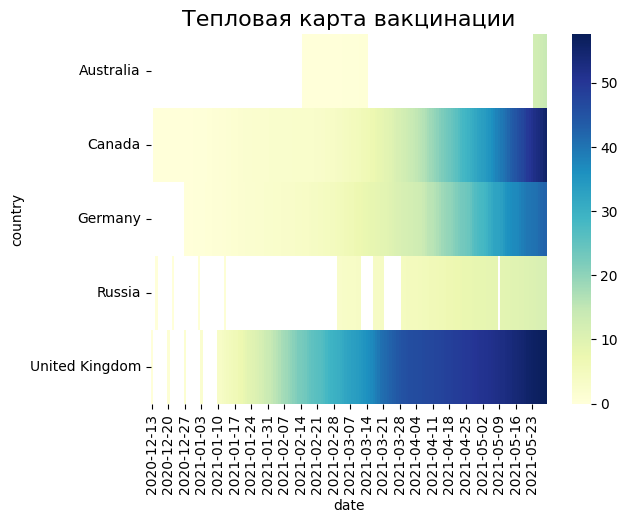

In [216]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)


heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16)


<Axes: xlabel='country', ylabel='total_vaccinations_per_hundred'>

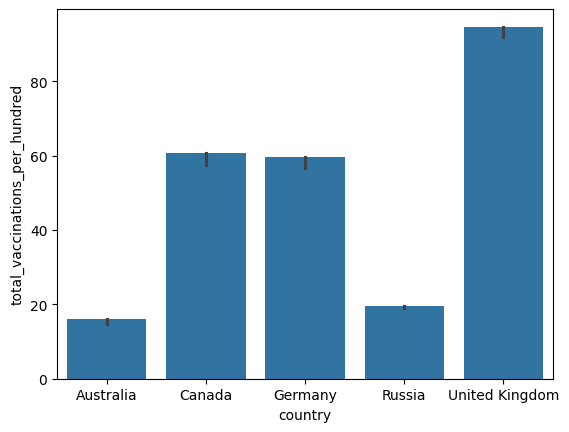

In [217]:
sns.barplot(
    data=croped_covid_df,
    x='country',
    y='total_vaccinations_per_hundred',
    estimator=max
)

In [218]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population'] * 100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16)
ЗАДАНИЕ 6.5

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    x='country',
    y='recover_rate',
    orient='v',
    width=0.9
)

SyntaxError: invalid syntax (706301295.py, line 12)

In [ ]:
line_data = covid_df.groupby('date', as_index=False)['daily_vaccinations'].sum()
fig = px.line(data_frame=line_data, x = 'date', y='daily_vaccinations')
fig.show()
ЗАДАНИЕ 7.6

choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="total_vaccinations", #от чего зависит цвет
    hover_name="country", #группирующая переменная
    animation_frame="date", #анимационный бегунок
    color_continuous_scale='Reds', #палитра цветов
    range_color=[0, 600e6] #диапазон цвета
)

fig.show()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,iso_code,...,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,death_rate,recovery_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


'\n\n\n\n\n\n'

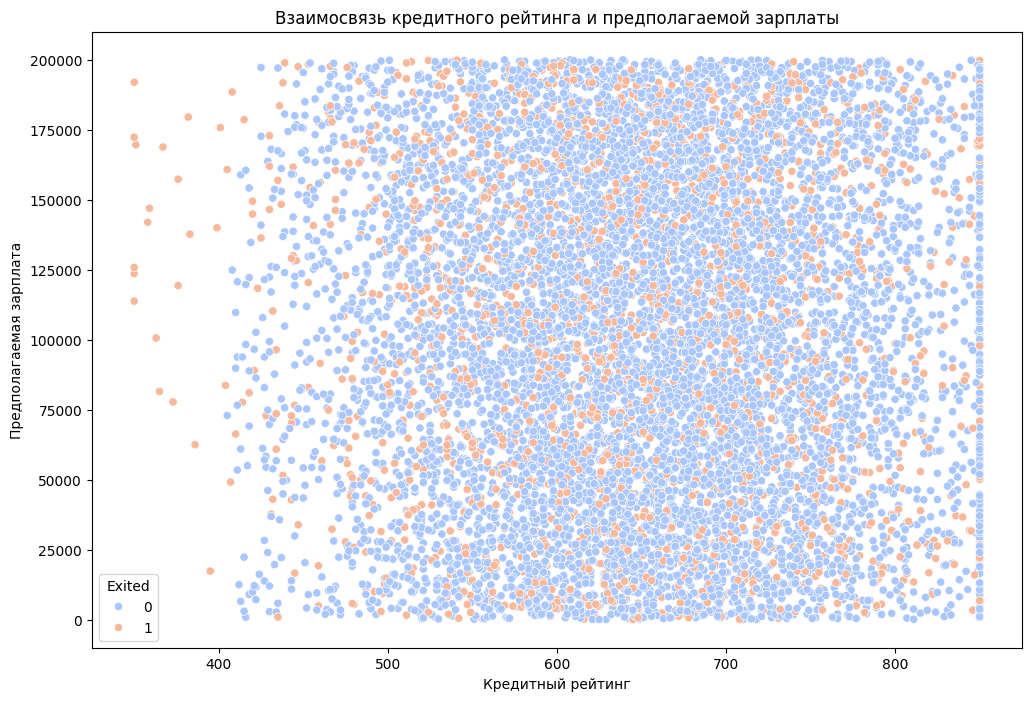

In [4]:
fig = plt.figure(figsize=(12, 8))

# Создаем рассеянный график с цветовой кодировкой по признаку оттока клиентов
scatter_plot = sns.scatterplot(data=churn, x='CreditScore', y='EstimatedSalary', hue='Exited', palette='coolwarm')

# Добавляем заголовок и подписи к осям
scatter_plot.set_title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты')
scatter_plot.set_xlabel('Кредитный рейтинг')
scatter_plot.set_ylabel('Предполагаемая зарплата')

'''





'''


In [1]:
from itertools import count


def my_sequence():
    cnt = count(1)  # Последовательность 1, 2, 3, 4, ...
    while True:
        yield next(cnt)
        yield 0


N, M = 5, 6
seq = my_sequence()
arr = [[next(seq) for j in range(N)] for i in range(M)]


# Можно напечатать и обычным print,
# но pretty print выводит матрицы в гораздо более наглядной форме

from pprint import pprint

pprint(arr)

[[1, 0, 2, 0, 3],
 [0, 4, 0, 5, 0],
 [6, 0, 7, 0, 8],
 [0, 9, 0, 10, 0],
 [11, 0, 12, 0, 13],
 [0, 14, 0, 15, 0]]
